In [ ]:
!pip install xgboost==2.0.2


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %pip install statsmodels
# from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# from statsmodels.tsa.stattools import adfuller
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np 
import os 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
#from fastdtw import fastdtw

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
regionalILI = pd.read_csv('ILINet_regional.csv', header=1)
regionalILI.head()
nationalILI = pd.read_csv('ILINet.csv', header=1)
nationalILI.head()


,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506


In [ ]:
regionalILI.head()

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,Census Regions,New England,1997,40,0.498535,0.623848,15,X,7,22,X,0,44,32,7053
1,Census Regions,Mid-Atlantic,1997,40,0.844144,1.321380,4,X,8,12,X,4,28,13,2119
2,Census Regions,East North Central,1997,40,0.792486,0.818738,28,X,20,28,X,3,79,47,9649
3,Census Regions,West North Central,1997,40,1.764050,1.279390,3,X,8,20,X,6,37,17,2892
4,Census Regions,South Atlantic,1997,40,0.502662,0.723380,14,X,22,14,X,0,50,30,6912


In [ ]:
regionalILI.drop(columns=['REGION TYPE','AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
       'AGE 50-64', 'AGE 65'], inplace=True)
nationalILI.drop(columns=['REGION','REGION TYPE','AGE 0-4', 'AGE 25-49', 'AGE 25-64', 'AGE 5-24',
       'AGE 50-64', 'AGE 65'], inplace=True)

In [ ]:
regionalILI['YEAR'].value_counts()

2020    477
2014    477
2003    477
2008    477
2000    468
2015    468
2007    468
1999    468
2022    468
2006    468
1998    468
2021    468
2013    468
2005    468
2012    468
2004    468
2019    468
2011    468
2018    468
2010    468
2002    468
2017    468
2009    468
2001    468
2016    468
2023    378
1997    126
Name: YEAR, dtype: int64

In [ ]:

regionalILI_encoded = pd.get_dummies(regionalILI, columns=['REGION'], prefix='')
regionalILI_encoded.head()

,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS,_East North Central,_East South Central,_Mid-Atlantic,_Mountain,_New England,_Pacific,_South Atlantic,_West North Central,_West South Central
0,1997,40,0.498535,0.623848,44,32,7053,0,0,0,0,1,0,0,0,0
1,1997,40,0.844144,1.321380,28,13,2119,0,0,1,0,0,0,0,0,0
2,1997,40,0.792486,0.818738,79,47,9649,1,0,0,0,0,0,0,0,0
3,1997,40,1.764050,1.279390,37,17,2892,0,0,0,0,0,0,0,1,0
4,1997,40,0.502662,0.723380,50,30,6912,0,0,0,0,0,0,1,0,0


In [ ]:
preCOVID = regionalILI[(regionalILI['YEAR'] <= 2018) | ((regionalILI['YEAR'] == 2019) & (regionalILI['WEEK'] <= 40))]
postCOVID = regionalILI[((regionalILI['YEAR'] == 2019) & (regionalILI['WEEK'] >= 40)) | (regionalILI['YEAR'] >= 2020)]
postCOVID.tail()
preCOVIDNational = nationalILI[((nationalILI['YEAR'] <= 2018) | ((nationalILI['YEAR'] == 2019) & (nationalILI['WEEK'] <= 40))) & ((nationalILI['YEAR'] >= 2003) | ((nationalILI['YEAR'] == 2002) & (nationalILI['WEEK'] >= 40))) ]
postCOVIDNational = nationalILI[((nationalILI['YEAR'] == 2019) & (nationalILI['WEEK'] >= 40)) | (nationalILI['YEAR'] >= 2020) & ((nationalILI['YEAR'] <= 2022) | ((nationalILI['YEAR'] == 2022) & (nationalILI['WEEK'] <= 40)))]
postCOVIDNational.tail()
pre2022National = nationalILI[((nationalILI['YEAR'] <= 2022) | ((nationalILI['YEAR'] == 2022) & (nationalILI['WEEK'] <= 40))) & ((nationalILI['YEAR'] >= 2003) | ((nationalILI['YEAR'] == 2002) & (nationalILI['WEEK'] >= 40))) ]
post2017National = nationalILI[((nationalILI['YEAR'] == 2017) & (nationalILI['WEEK'] >= 40)) | (nationalILI['YEAR'] >= 2018) & ((nationalILI['YEAR'] <= 2022) | ((nationalILI['YEAR'] == 2022) & (nationalILI['WEEK'] <= 40)))]

testYear2022_2023 = nationalILI[((nationalILI['YEAR'] == 2022) & (nationalILI['WEEK'] >= 40)) | ((nationalILI['YEAR'] == 2023) & (nationalILI['WEEK'] <= 40))]
testYear2022_2023.tail()

,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
1353,2023,36,2.01848,2.01275,44496,3533,2210702
1354,2023,37,1.94850,1.97708,45006,3549,2276390
1355,2023,38,2.03099,2.11456,47868,3552,2263734
1356,2023,39,2.10369,2.18035,49264,3547,2259450
1357,2023,40,2.25758,2.24367,55806,4095,2487262


In [ ]:
preCOVIDNational.to_csv('preCOVID_ILI.csv')
postCOVIDNational.to_csv('postCOVID_ILI.csv')

In [ ]:
pre2022National[(pre2022National['WEEK'] == 53) | (pre2022National['WEEK'] == 52)| (pre2022National['WEEK'] == 1)]

,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
273,2002,52,2.57842,1.98008,2857,865,144287
274,2003,1,2.38636,1.90428,3260,879,171193
325,2003,52,7.62797,7.06496,16415,1122,232344
326,2003,53,5.14051,4.55115,11332,1139,248992
327,2004,1,2.89129,2.41833,7602,1160,314349
378,2004,52,2.77052,2.56649,7279,1332,283617
379,2005,1,2.40064,2.17645,8041,1383,369455
430,2005,52,3.28238,3.05278,8842,1273,289638
431,2006,1,2.62914,2.42504,8339,1319,343871
482,2006,52,3.02597,3.11549,8913,1359,286087


In [ ]:
preCOVIDNational.head()


,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
261,2002,40,1.22262,1.16668,2060,754,176569
262,2002,41,1.33344,1.21650,2267,785,186355
263,2002,42,1.31929,1.13057,2176,831,192469
264,2002,43,1.49484,1.25246,2599,863,207512
265,2002,44,1.47195,1.30237,2907,909,223208


In [ ]:
 
postCOVID_encoded = pd.get_dummies(postCOVID[['REGION', 'YEAR', 'WEEK', 'ILITOTAL']], columns=['REGION'], prefix='Region', prefix_sep = " ")
postCOVID_encoded.head()

postCOVID_x = postCOVID_encoded.drop(columns=['ILITOTAL'])
postCOVID_y = postCOVID_encoded['ILITOTAL']
postCOVIDNational_x = postCOVIDNational[['YEAR', 'WEEK']]
postCOVIDNational_y = postCOVIDNational['ILITOTAL']

In [ ]:
preCOVID_encoded = pd.get_dummies(preCOVID[['REGION', 'YEAR', 'WEEK', 'ILITOTAL']], columns=['REGION'], prefix='Region', prefix_sep = " ")
preCOVID_encoded.head()

,YEAR,WEEK,ILITOTAL,Region East North Central,Region East South Central,Region Mid-Atlantic,Region Mountain,Region New England,Region Pacific,Region South Atlantic,Region West North Central,Region West South Central
0,1997,40,44,0,0,0,0,1,0,0,0,0
1,1997,40,28,0,0,1,0,0,0,0,0,0
2,1997,40,79,1,0,0,0,0,0,0,0,0
3,1997,40,37,0,0,0,0,0,0,0,1,0
4,1997,40,50,0,0,0,0,0,0,1,0,0


In [ ]:
preCOVID_encoded_drop_years = preCOVID_encoded[(preCOVID_encoded['YEAR'] != 2014) & (preCOVID_encoded['YEAR'] != 2003) & (preCOVID_encoded['YEAR'] != 2008) & (preCOVID_encoded['YEAR'] != 1997)]
# & ((preCOVID_encoded['YEAR'] == 1998) & (preCOVID_encoded['WEEK'] < 40))
preCOVID_encoded_drop_years = preCOVID_encoded_drop_years[(preCOVID_encoded_drop_years['YEAR'] != 1998) | ((preCOVID_encoded_drop_years['YEAR'] == 1998) & (preCOVID_encoded_drop_years['WEEK'] >= 40))]
preCOVID_drop_years_nat = preCOVIDNational[(preCOVIDNational['YEAR'] != 2014) & (preCOVIDNational['YEAR'] != 2003) & (preCOVIDNational['YEAR'] != 2008) & (preCOVIDNational['YEAR'] != 1997)]
# & ((preCOVID_encoded['YEAR'] == 1998) & (preCOVID_encoded['WEEK'] < 40))
preCOVID_drop_years_nat = preCOVID_drop_years_nat[(preCOVID_drop_years_nat['YEAR'] != 1998) | ((preCOVID_drop_years_nat['YEAR'] == 1998) & (preCOVID_drop_years_nat['WEEK'] >= 40))]

In [ ]:
sum(preCOVID_encoded_drop_years['YEAR'].value_counts().to_list())/ 9 / 52 # len(preCOVID_encoded_drop_years['YEAR'].value_counts())#.to_list()) # ITS COUNTING ONE OF THE 40 WEEKS TWICE

18.01923076923077

In [ ]:
preCOVID_encoded_drop_years['YEAR'].value_counts()

2000    468
2016    468
2007    468
1999    468
2006    468
2013    468
2005    468
2012    468
2004    468
2015    468
2011    468
2018    468
2010    468
2002    468
2017    468
2009    468
2001    468
2019    360
1998    117
Name: YEAR, dtype: int64

In [ ]:
len(preCOVID_encoded_drop_years['YEAR'].value_counts().to_list())

19

In [ ]:
preCOVID_encoded_drop_years.iloc[0:468] # the split is really in counts of 468 if the year only has 52 weeks 
# but!!!! you could use the value counts to get the indices potentially? make a function for that?

,YEAR,WEEK,ILITOTAL,Region East North Central,Region East South Central,Region Mid-Atlantic,Region Mountain,Region New England,Region Pacific,Region South Atlantic,Region West North Central,Region West South Central
477,1998,40,45,0,0,0,0,1,0,0,0,0
478,1998,40,60,0,0,1,0,0,0,0,0,0
479,1998,40,103,1,0,0,0,0,0,0,0,0
480,1998,40,32,0,0,0,0,0,0,0,1,0
481,1998,40,36,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
940,1999,39,0,0,0,0,0,0,0,1,0,0
941,1999,39,0,0,1,0,0,0,0,0,0,0
942,1999,39,0,0,0,0,0,0,0,0,0,1
943,1999,39,0,0,0,0,1,0,0,0,0,0


In [ ]:
# need to figure out a way to index based on the weeks being 40-40
# preCOVID_encoded['YEAR'].value_counts()
sum(preCOVIDNational['YEAR'].value_counts().to_list()) / (len(preCOVIDNational['YEAR'].value_counts().to_list()) - 1)

52.23529411764706

In [ ]:
models = [
    #("SVR", SVR(C = 0.1)),
    ("Decision Tree Regression", DecisionTreeRegressor()),
    ("Random Forest Regression", RandomForestRegressor( n_estimators=150)), 
    ("Random Forest Regression3", RandomForestRegressor( n_estimators=300)), 
    ("Random Forest Regression2", RandomForestRegressor(min_samples_split = 3,  n_estimators=75)), 
    ("Gradient Boosting Regression", GradientBoostingRegressor(loss='squared_error', n_estimators=500, max_depth=5, learning_rate=0.01)),
    ("Gradient Boosting Regression4", GradientBoostingRegressor(loss='squared_error', n_estimators=300, max_depth=5, learning_rate=0.012)),
    ("Gradient Boosting Regression5", GradientBoostingRegressor(loss='squared_error', n_estimators=700, max_depth=4, learning_rate=0.001)),
    ("Gradient Boosting Regression2", GradientBoostingRegressor(loss='squared_error', n_estimators=300, max_depth=5, learning_rate=0.05)),
    ("Gradient Boosting Regression3", GradientBoostingRegressor(loss='huber', n_estimators=375, max_depth=3, learning_rate=0.02, random_state=0, max_features=2, alpha=0.95)),
    ('xgb', XGBRegressor()),
    ("K-Nearest Neighbors Regression", KNeighborsRegressor()),
    ("K-Nearest Neighbors Regression2", KNeighborsRegressor(n_neighbors=7, weights='distance')), 
    ("K-Nearest Neighbors Regression3", KNeighborsRegressor(n_neighbors=3))
]

In [ ]:
# data = preCOVID_encoded_drop_years.drop(columns=['ILITOTAL'])
# target = preCOVID_encoded_drop_years['ILITOTAL']
data_pre2022 = pre2022National[['YEAR', 'WEEK']]
target_pre2022 = pre2022National['% WEIGHTED ILI']
data_pre2022.reset_index(inplace=True, drop=True)

data_post2017 = post2017National[['YEAR', 'WEEK']]
target_post2017 = post2017National['% WEIGHTED ILI']
data_post2017.reset_index(inplace=True, drop=True)

data_post_covid = postCOVIDNational[['YEAR', 'WEEK']]
target_post_covid = postCOVIDNational['% WEIGHTED ILI']
data_post_covid.reset_index(inplace=True, drop=True)

data_test_2023 = testYear2022_2023[['YEAR', 'WEEK']]
target_test_2023 = testYear2022_2023['% WEIGHTED ILI']
data_test_2023.reset_index(inplace=True, drop=True)

data_national = preCOVIDNational[['YEAR', 'WEEK']]#.drop(columns=['ILITOTAL'])
target_national = preCOVIDNational['% WEIGHTED ILI']
data_national.reset_index(inplace=True, drop=True)


In [ ]:
data_national.iloc[157:]

,YEAR,WEEK
157,2005,40
158,2005,41
159,2005,42
160,2005,43
161,2005,44
...,...,...
883,2019,36
884,2019,37
885,2019,38
886,2019,39


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
preCOVID_encoded_drop_years['YearWeek'] = preCOVID_encoded_drop_years['YEAR'].astype(str) + preCOVID_encoded_drop_years['WEEK'].astype(str).str.zfill(2)

# Getting the unique 'YearWeek' values and translating them to integers (For TSCV, the split column should be integer or date)
unique_periods = np.array(list(map(int, preCOVID_encoded_drop_years['YearWeek'].unique())))

# Defining the TimeSeriesSplit with your specific parameters
tscv = TimeSeriesSplit(n_splits = int((len(unique_periods)) / 52) - 1) 

count = 0
for train_index, test_index in tscv.split(unique_periods):

    train_periods = unique_periods[-train_index - 1]
    test_periods = unique_periods[-test_index]

    # Splitting the original data
    train_data = preCOVID_encoded_drop_years[preCOVID_encoded_drop_years['YearWeek'].isin(train_periods.astype(str))]
    test_data = preCOVID_encoded_drop_years[preCOVID_encoded_drop_years['YearWeek'].isin(test_periods.astype(str))]
    if count <2:
        print(train_data, '/n', test_data)
    else:
        break
    count+=1

       YEAR  WEEK  ILITOTAL  Region East North Central  \
9864   2018    40       800                          0   
9865   2018    40      4298                          0   
9866   2018    40      1135                          1   
9867   2018    40       541                          0   
9868   2018    40      4931                          0   
...     ...   ...       ...                        ...   
10336  2019    40      6059                          0   
10337  2019    40      2146                          0   
10338  2019    40      3179                          0   
10339  2019    40      1764                          0   
10340  2019    40      1582                          0   

       Region East South Central  Region Mid-Atlantic  Region Mountain  \
9864                           0                    0                0   
9865                           0                    1                0   
9866                           0                    0                0   
9867   

In [ ]:
week_ct = sum(preCOVIDNational['YEAR'].value_counts().to_list()) / (len(preCOVIDNational['YEAR'].value_counts().to_list()) - 1)
total_years = int(sum(preCOVIDNational['YEAR'].value_counts().to_list())/ week_ct)
total_years
# int(sum(preCOVIDNational['YEAR'].value_counts().to_list())/ 9 / week_ct)
# sum(preCOVIDNational['YEAR'].value_counts().to_list()) / week_ct
sum(preCOVIDNational['YEAR'].value_counts().to_list())
# previously 17 years so if you want 10 years, do 
precov_test_x = data_national.iloc[-105:]
precov_test_y = target_national.iloc[-105:]
data_national_final = data_national.iloc[157:-105]
target_national_final = target_national.iloc[157:-105]


In [ ]:
from tqdm import tqdm
from sklearn.model_selection import TimeSeriesSplit
rmse_scores = []
bestrmse = 10000000000
train_years = 52
val_years = 52
# num of splits when using last 2 years out performed best on splits 6 - the indices were 105 to -105
#total_years = len(preCOVID_encoded_drop_years.value_counts('YEAR'))
years_to_use = post2017National
# data_to_use = data_post2017
data_to_use = data_post_covid
# target_to_use = target_post2017
target_to_use = target_post_covid
week_ct = sum(years_to_use['YEAR'].value_counts().to_list()) / (len(years_to_use['YEAR'].value_counts().to_list()) - 1)
total_years = int(sum(years_to_use['YEAR'].value_counts().to_list()) / week_ct)
total_weeks = sum(years_to_use['YEAR'].value_counts().to_list())
n_splits = total_weeks - (train_years + val_years) + 1
tscv = TimeSeriesSplit(n_splits=9)
#for train_index, val_index in tscv.split(data):
for i, (train_index, val_index) in enumerate(tscv.split(data_to_use)):
    train_data, val_data = data_to_use.iloc[train_index], data_to_use.iloc[val_index]
    print(f"Fold {i}:")
    print(f"  Train: index={train_index[0], train_index[-1]}")
    print(f"  Test:  index={val_index[0], val_index[-1]}")

    # print(train_data.head())
    # print(val_data.head())
    train_target, val_target = target_to_use.iloc[train_index], target_to_use.iloc[val_index]
    for model in models:
    

        modelName = model[0]
        # print(model[0])
        model = model[1]
        model.fit(train_data ,train_target)
        test_pred = model.predict(val_data)

        #test_pred = model.predict(valX_prepared)
        rmse = np.sqrt(mean_squared_error(val_target, test_pred))
        # print(rmse)
        if rmse < bestrmse:
            bestrmse = rmse
            print(bestrmse, 'best', modelName)
            bestmodel = model
        
    rmse_scores.append(bestrmse)
print(rmse_scores)

Fold 0:
  Train: index=(0, 16)
  Test:  index=(17, 33)
2.9825137303840545 best Decision Tree Regression
2.7800889805771725 best Random Forest Regression
2.7153370324554 best Random Forest Regression3
2.676142781419851 best Random Forest Regression2
2.2957662733632027 best Gradient Boosting Regression5
2.2561716751978733 best K-Nearest Neighbors Regression
1.8383230764833574 best K-Nearest Neighbors Regression2
Fold 1:
  Train: index=(0, 33)
  Test:  index=(34, 50)
0.3698252869236722 best Decision Tree Regression
0.2541332333071654 best Random Forest Regression
0.23432192518989012 best Gradient Boosting Regression
0.23006977157480854 best Gradient Boosting Regression3
0.1692554225216678 best xgb
Fold 2:
  Train: index=(0, 50)
  Test:  index=(51, 67)
Fold 3:
  Train: index=(0, 67)
  Test:  index=(68, 84)
Fold 4:
  Train: index=(0, 84)
  Test:  index=(85, 101)
Fold 5:
  Train: index=(0, 101)
  Test:  index=(102, 118)
Fold 6:
  Train: index=(0, 118)
  Test:  index=(119, 135)
Fold 7:
  Trai

In [ ]:
val_data = data_test_2023
val_target = target_test_2023
# train_data = data_post_covid
train_data = data_national # this is 2002-2019
# train_data = data_post2017
# train_data = data_pre2022
# train_target = target_post_covid
bestrmse = 1000000
rmse_scores = []
# train_target = target_post2017
# train_target = target_pre2022
train_target = target_national
for model in models:
    

    modelName = model[0]
    print(model[0])
    model = model[1]
    model.fit(train_data ,train_target)
    test_pred = model.predict(val_data)

    #test_pred = model.predict(valX_prepared)
    rmse = np.sqrt(mean_squared_error(val_target, test_pred))
    print(rmse)
    if rmse < bestrmse:
        bestrmse = rmse
        print(bestrmse, 'best', modelName)
        bestmodel = model
    rmse_scores.append(bestrmse)
print(rmse_scores)

Decision Tree Regression
1.9501633042968625
1.9501633042968625 best Decision Tree Regression
Random Forest Regression
1.9179127871301385
1.9179127871301385 best Random Forest Regression
Random Forest Regression3
1.9228892971456675
Random Forest Regression2
1.9124423635584271
1.9124423635584271 best Random Forest Regression2
Gradient Boosting Regression
1.9656558856006476
Gradient Boosting Regression4
1.9700925597320713
Gradient Boosting Regression5
1.8663685284159486
1.8663685284159486 best Gradient Boosting Regression5
Gradient Boosting Regression2
1.9004338087344494
Gradient Boosting Regression3
1.9073148913146678
xgb
1.934315271231205
K-Nearest Neighbors Regression
1.942643962004862
K-Nearest Neighbors Regression2
1.9510463850363557
K-Nearest Neighbors Regression3
1.9527173482751143
[1.9501633042968625, 1.9179127871301385, 1.9179127871301385, 1.9124423635584271, 1.9124423635584271, 1.9124423635584271, 1.8663685284159486, 1.8663685284159486, 1.8663685284159486, 1.8663685284159486, 1.

In [ ]:
# test_pred = bestmodel.predict(postCOVID_x)
# test_pred = bestmodel.predict(postCOVIDNational_x)
# test_pred = bestmodel.predict(precov_test_x)
test_pred = bestmodel.predict(data_test_2023)

# rmse = np.sqrt(mean_squared_error(postCOVIDNational_y, test_pred))

# rmse = np.sqrt(mean_squared_error(precov_test_y, test_pred))
rmse = np.sqrt(mean_squared_error(target_test_2023, test_pred))
rmse

1.8663685284159486

In [ ]:
# np.array(precov_test_y)
#test_pred

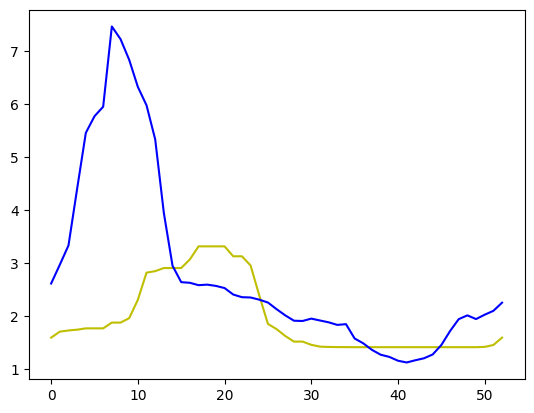

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test_pred, c='y')
plt.plot(np.array(target_test_2023), c='b')

# Try arima

In [ ]:
%pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 94.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 44.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# code is from https://pypi.org/project/pmdarima/
# # Load/split your data
# y = pm.datasets.load_wineind()
y = target_national_final
train, test = train_test_split(y, train_size=y.shape[0]-104)

# Fit your model
# method "nm" suggested for faster on docs https://alkaline-ml.com/pmdarima/tips_and_tricks.html
# default iter is ~50. shit the bed for me around 30, 25 also take obscenely long
model = pm.auto_arima(train, seasonal=True, m=52, max_iter=25, trace=True, stepwise=True)
# model = pm.auto_arima(train, m=12, max_iter=20)
# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:y.shape[0]-104], train, c='blue')
plt.plot(x[y.shape[0]-104:], forecasts, c='green')
plt.plot(x[y.shape[0]-104:], test, c='red')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=55.017, Time=61.71 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=1657.040, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=208.943, Time=16.41 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=976.493, Time=11.68 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2276.890, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=87.011, Time=53.89 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=66.727, Time=52.60 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=67.703, Time=771.01 sec
 ARIMA(2,0,2)(1,0,2)[52] intercept   : AIC=inf, Time=656.29 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=142.099, Time=2.68 sec
 ARIMA(2,0,2)(0,0,2)[52] intercept   : AIC=71.564, Time=704.56 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=58.123, Time=675.81 sec


KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
x = np.arange(y.shape[0])
plt.plot(x[:y.shape[0]-104], train, c='blue')
plt.plot(x[y.shape[0]-104:], forecasts, c='green')
plt.plot(x[y.shape[0]-104:], test, c='red')
plt.show()

NameError: name 'np' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c7e7b740-ad7d-41a8-9704-cb0c6a8385eb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>